# Polynomial Interpolation – Exercise 1, Problem 4


## Lagrange Interpolation


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def cardinal(xdata, x):
    """
    cardinal(xdata, x): 
    In: xdata, array with the nodes x_i.
        x, array or a scalar of values in which the cardinal functions are evaluated.
    Return: l: a list of arrays of the cardinal functions evaluated in x. 
    """
    n = len(xdata)              # Number of evaluation points x
    l = []
    for i in range(n):          # Loop over the cardinal functions
        li = np.ones(len(x))
        for j in range(n):      # Loop to make the product for l_i
            if i is not j:
                li = li*(x-xdata[j])/(xdata[i]-xdata[j])
        l.append(li)            # Append the array to the list            
    return l

In [3]:
def lagrange(ydata, l):
    """
    lagrange(ydata, l):
    In: ydata, array of the y-values of the interpolation points.
         l, a list of the cardinal functions, given by `cardinal(xdata, x)`
    Return: An array with the interpolation polynomial (evaluated at `x`). 
    """
    poly = 0                        
    for i in range(len(ydata)):
        poly = poly + ydata[i]*l[i]  
    return poly

### a) 

#### 1)

From mathematics 1 we know that the Maclaurin series of $\sin(x)$ of order 3 is given by
\begin{align*}
    P_3(x) = x - \frac{x^3}{3} \approx 1.000x - 0.3333x^3.
\end{align*}

#### 2)
For the second task we will calculate explicitly. Note that
\begin{align*}
    &\text{• } f'(x) &= \cos(x)\\
    &\text{• } f''(x) &= -\sin(x)\\
    &\text{• } f^{(3)}(x) &= -\cos(x)
\end{align*}

Thus
\begin{align*}
    P_3^*(x)
    &=
    f\left(\frac{\pi}{4}\right)
    +
    f'\left(\frac{\pi}{4}\right)  \left(x-\frac{\pi}{4}\right)
    +
    \frac{1}{2}f''\left(\frac{\pi}{4}\right)  \left(x-\frac{\pi}{4}\right)^2
    +
    \frac{1}{6}f^{(3)}\left(\frac{\pi}{4}\right)  \left(x-\frac{\pi}{4}\right)^3\\
    &=
    \frac{\sqrt{2}}{2}
    +
    \frac{\sqrt{2}}{2}  \left(x-\frac{\pi}{4}\right)
    -
    \frac{\sqrt{2}}{4}  \left(x-\frac{\pi}{4}\right)^2
    -
    \frac{\sqrt{2}}{12}  \left(x-\frac{\pi}{4}\right)^3\\
    &=
    \frac{ \sqrt{2}(\pi^3 - 12\pi^2 - 96\pi + 384) }{768}
    +
    \frac{ \sqrt{2}(-\pi^2 + 8\pi + 32) }{64} x
    +
    \frac{ \sqrt{2}(\pi - 4) }{16} x^2
    -
    \frac{\sqrt{2}}{12} x^3\\
    &\approx
    -9.247\cdot10^{-3} + 1.044 x - 0.07587 x^2 - 0.1179 x^3,
\end{align*}
is the Taylor expansion of order 3 of $f(x)$ centered at $x=\frac{\pi}{4}$.

#### 3)
On the interval $\left[0,\frac{\pi}{2}\right]$ we get the equidistant points $x_0=0$, $x_1=\frac{\pi}{6}$, $x_2=\frac{\pi}{3}$, $x_3=\frac{\pi}{2}$. Thus we obtain the cardinal functions
\begin{align*}
    &\text{• }
    \ell_0(x)
    &=
    \frac{(x-x_1)(x-x_2)(x-x_3)}{(x_0-x_1)(x_0-x_2)(x_0-x_3)}
    &=
    \frac{- 36 x^3 + 36 \pi x^2 - 11 \pi^2 x + \pi^3}{\pi^3}
    \\
    &\text{• }
    \ell_1(x)
    &=
    \frac{(x-x_0)(x-x_2)(x-x_3)}{(x_1-x_0)(x_1-x_2)(x_1-x_3)}
    &=
    \frac{108 x^3 - 90 \pi x^2 + 18 \pi^2 x}{\pi^3}
    \\
    &\text{• }
    \ell_2(x)
    &=
    \frac{(x-x_0)(x-x_1)(x-x_3)}{(x_2-x_0)(x_2-x_1)(x_2-x_3)}
    &=
    \frac{-108 x^3 + 72 \pi x^2 - 9 \pi^2 x}{\pi^3}
    \\
    &\text{• }
    \ell_3(x)
    &=
    \frac{(x-x_0)(x-x_1)(x-x_2)}{(x_3-x_0)(x_3-x_1)(x_3-x_2)}
    &=
    \frac{36 x^3 - 18 \pi x^2 + 2 \pi^2 x}{\pi^3}.
\end{align*}

Thus the interpolating polynomial is given by
\begin{align*}
    p_3(x)
    &=
    y_0 \ell_0(x) + y_1 \ell_1(x) + y_2 \ell_2(x) + y_3 \ell_3(x)\\
    &=
    \frac{-9\sqrt{3}+22}{2\pi} x
    +
    \frac{36\sqrt{3}-63}{\pi^2} x^2
    +
    \frac{-54\sqrt{3}+90}{\pi^3} x^3\\
    &\approx
    1.020x - 0.06547x^2 - 0.1139x^3.
\end{align*}

#### 4)
Comparing the coefficients, we see that both the Taylor polynomial centered at $x=0$ have no constant term, since they both interpolate exactly at $0$. Moreover, the Taylor polynomial centered at $x=\pi/4$ only has a small constant being approximately $0.01$.

All the polynomials have a coefficient of around $1$ for the linear term, though both the second Taylor polynomial and the Lagrange interpolating polynomial have a slighter larger value for this coefficient.

The coefficient for the quadratic term is small for both the second Taylor polynomial and the Lagrange interpolating polynomial, and zero for the first Taylor polynomial.

Lastly we observe that the coefficient for the the cubic term is very similar for both the second Taylor polynomial and the Lagrange interpolating polynomial, but approximately 3 times larger for the first Taylor polynomial. This makes sense, since the first Taylor polynomial only has information from the left end of the interval and thus is likely to overshoot at the right end.

All in all we see that the second Taylor polynomial and the Lagrange interpolating polynomial have similar coefficients since they balance the weight around the interval, while the first Taylor polynomial is centered around $x=0$.

### b)

#### 1)

Taylor's theorem gives the following expression for the error for the Taylor polynomial of $f$ of order $n$ centered around $x=a$:
\begin{align*}
    E_n(x)
    =
    f(x) - P_n(x)
    =
    \frac{f^{(n+1)}(s)}{(n+1)!}(x-a)^{n+1},
\end{align*}
where $s\in(a,x)$.

In our case $a=0$, so we can bound
\begin{align*}
    \lvert (x-0)^{n+1} \rvert \leq \left( \frac{\pi}{2} \right)^n,
\end{align*}
since $x\in[0, \pi/2]$.

Moreover, since the derivative of $\sin(x)$ is $\cos(x)$, and the derivative of $\cos(x)$ is $-\sin(x)$, we have that $\lvert f^{(n+1)}(x) \rvert \leq 1$ for all $x \in [0, \pi/2]$.

Thus we get the error bound
\begin{align*}
    \lvert E_n(x) \rvert
    \leq
    \frac{\pi^n}{2^n(n+1)!}.
\end{align*}

Note that for $n > 0$ we have $(n+1)! > (\pi/2)^n$ with (n+1)! additionally growing faster than $(\pi/2)^n$, and thus the error is decreasing. To find the right order, we bound the error for various $n$:
\begin{align*}
    &\text{• } E_1    \leq 0.785399\\
    &\text{• } E_2    \leq 0.411234\\
    &\text{• } E_3    \leq 0.161492\\
    &\text{• } E_4    \leq 0.050734\\
    &\text{• } E_5    \leq 0.013283\\
    &\text{• } E_6    \leq 0.002981\\
    &\text{• } E_7    \leq 0.000586\\
    &\text{• } E_8    \leq 0.000103\\
    &\text{• } E_9    \leq 0.000017\\
    &\text{• } E_{10} \leq 0.000003\\
    &\text{• } E_{11} < 0.000001
\end{align*}
Thus we need a Taylor polyomial of at least order $11$ to guarantee an error of less than 10^(-6) on the interval.

#### 2)
For Lagrange interpolation we have a similar estimate, given by
\begin{align*}
    e_n(x)
    =
    f(x) - p_n(x)
    =
    \frac{f^{(n+1)}(s)}{(n+1)!}\omega(x),
\end{align*}
where $s\in(a,x)$ and $\omega(x)=\Pi_{i=0}^n (x-x_i)$.

From the lecture notes, we have an easy bound for $\omega(x)$ given that the nodes $x_i$ are equidistant:
\begin{align*}
    \lvert \omega(x) \rvert \leq \frac{h^{n+1}}{4}n!,
\end{align*}
where $h=x_{i+1}-x_i=(b-a)/n=\pi/(2n)$.

Using this we get the error bound
\begin{align*}
    \lvert e_n(x) \rvert
    \leq
    \frac{1}{4(n+1)} \left( \frac{\pi}{2n} \right)^{n+1}.
\end{align*}

Again we try for different values of $n$:
\begin{align*}
    &\text{• } e_1    \leq 0.308426\\
    &\text{• } e_2    \leq 0.040373\\
    &\text{• } e_3    \leq 0.004698\\
    &\text{• } e_4    \leq 0.000467\\
    &\text{• } e_5    \leq 0.000041\\
    &\text{• } e_6    \leq 0.000004\\
    &\text{• } e_7    < 0.000001\\
\end{align*}
Thus we see for the Lagrange interpolating polynomial we only need $8$ equidistributed nodes, corresponding to a polynomial of order $7$ to guarantee an error of less than 10^(-6) on the interval.

### c)

**OBS:** Some mistakes in the task description. We want to look at polynomials of order 5, which will be equivalent to 6 equidistant points

In [4]:
def taylor_pol(x:float) -> float:
    """
    Taylor polynomial of sin(x) of order 5 centered at x=0.
    """
    return x - (x**3)/6 + (x**5)/120

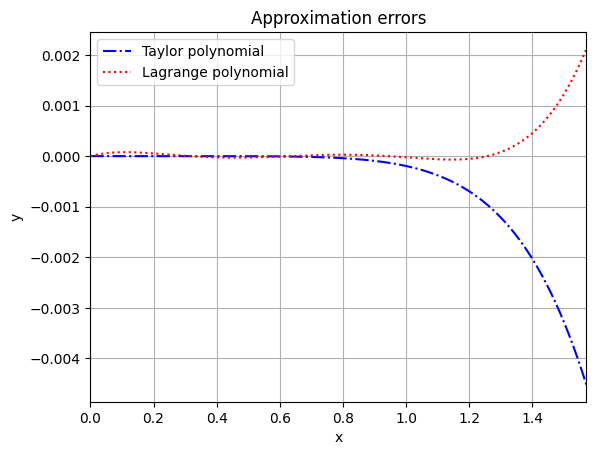

In [5]:
x_arr = np.linspace(0, np.pi/2, 1000) # x values for plotting
taylor_arr = taylor_pol(x_arr) # Taylor polynomial values
taylor_error = np.sin(x_arr) - taylor_arr # Error of Taylor polynomial

xdata = np.array([i*np.pi/10 for i in range(5)]) # x values for interpolation
ydata = np.sin(xdata) # y values for interpolation
l = cardinal(xdata, x_arr) # Cardinal functions evaluated at x_arr
lagrange_arr = lagrange(ydata, l) # Lagrange polynomial evaluated at x_arr
lagrange_error = np.sin(x_arr) - lagrange_arr # Error of Lagrange polynomial

# Plotting
plt.plot(x_arr, taylor_error, label='Taylor polynomial', color='blue', linestyle='-.')
plt.plot(x_arr, lagrange_error, label='Lagrange polynomial', color='red', linestyle=':')
plt.title('Approximation errors')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.xlim(0, np.pi/2)
plt.show()

### d)

We observe that the Taylor polynomial is more stable up to around $x=0.6$ For $x>0.8$ it does however explode and the error becomes much larger than for the Lagrange polynomial. We still see this explosive type behavior for the Lagrange polynomial, but on a lesser scale. We could also try to do Lagrange interpolation with Chebyshev nodes and obtain a better approximation:

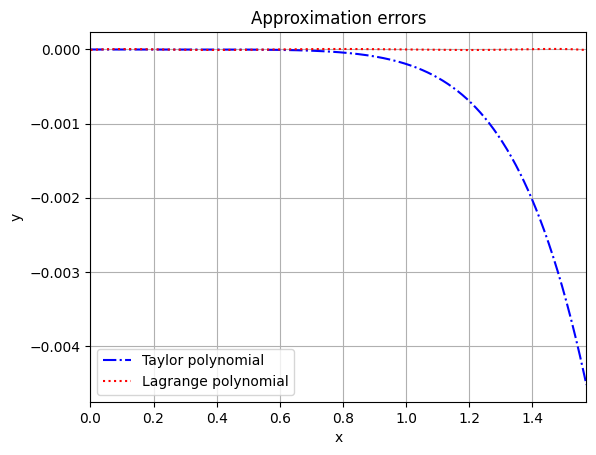

In [6]:
xdata = np.pi/4 + np.pi/4 * np.array([np.cos((2*i+1)*np.pi/12) for i in range(6)]) # Chebyshev nodes
ydata = np.sin(xdata) # y values for interpolation
l = cardinal(xdata, x_arr) # Cardinal functions evaluated at x_arr
lagrange_arr = lagrange(ydata, l) # Lagrange polynomial evaluated at x_arr
lagrange_error = np.sin(x_arr) - lagrange_arr # Error of Lagrange polynomial

# Plotting
plt.plot(x_arr, taylor_error, label='Taylor polynomial', color='blue', linestyle='-.')
plt.plot(x_arr, lagrange_error, label='Lagrange polynomial', color='red', linestyle=':')
plt.title('Approximation errors')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid()
plt.xlim(0, np.pi/2)
plt.show()

Here the error seems to be almost zero everywhere for the Lagrange polynomial.

The disadvantage of Taylor expansion is that you require to know the derivatives at $a$ in order to obtain a polynomial. However, it only requires information at that point, while Lagrange interpolation requires the function value at several points. For our function it is easy to calculate a Taylor polynomial centered at zero, but we wouldn't necessarily know the function values at random points without already having an algorithm to calculate $\sin(x)$!